<a href="https://colab.research.google.com/github/ninja-medved/engen_comp_packages/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as ns
import matplotlib.pyplot as plt
#SibSp - количество братьев и сестер/супругов на борту
#Parch - количество родителей/детей на борту
#Fare - Стоимость проезда
#Embarked - Порт посадки (C = Шербур; Q = Квинстаун; S = Саутгемптон)
#Pclass is a proxy for socio-economic status (SES)
#1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
data = pd.read_csv("titanic.csv", delimiter = ',')
data.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


(-1.1093057760597644,
 1.100443136870084,
 -1.1090973334668688,
 1.1034710657498656)

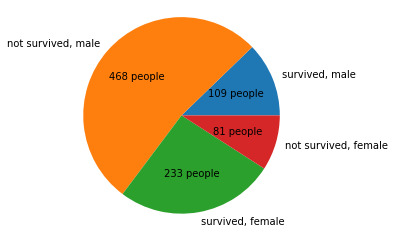

In [21]:
survived_or_not_number = {"survived, male" : 0, "not survived, male" : 0, "survived, female" : 0, "not survived, female" : 0}
# print(data.iloc[1])
# print(int(data.size/12))
# print(data.size)
for i in range(len(data.index)):
  #print(i)
  if data.iloc[i]["Survived"] == 1 and data.iloc[i]["Sex"] == "male":
    survived_or_not_number["survived, male"] += 1
  elif data.iloc[i]["Sex"] == "male":
    survived_or_not_number["not survived, male"] += 1
  elif data.iloc[i]["Survived"] == 1 and data.iloc[i]["Sex"] == "female":
    survived_or_not_number["survived, female"] += 1
  elif data.iloc[i]["Sex"] == "female":
    survived_or_not_number["not survived, female"] += 1
  
# print(survived_or_not_number)
fig, ax = plt.subplots()
ax.pie(survived_or_not_number.values(), labels=survived_or_not_number.keys(), autopct=lambda p:f'{p*sum(survived_or_not_number.values())/100 :.0f} people')
ax.axis("equal")

{'1st, survived': 136, '1st, not survived': 80, '2nd, survived': 87, '2nd, not survived': 97, '3rd, survived': 119, '3rd, not survived': 372}


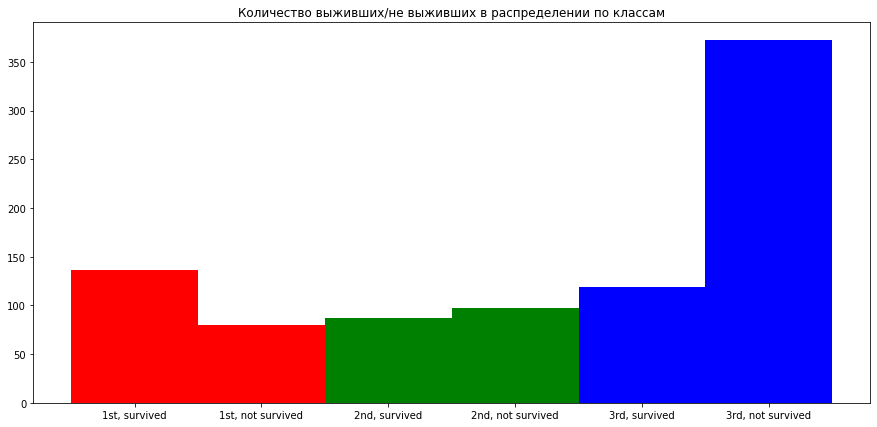

In [30]:
Pclass_survived = {"1st, survived" : 0, "1st, not survived" : 0, "2nd, survived" : 0, "2nd, not survived" : 0, "3rd, survived" : 0,"3rd, not survived" : 0,}
for i in range(len(data.index)):
  if data.iloc[i]["Survived"] == 1 and data.iloc[i]["Pclass"] == 1:
    Pclass_survived["1st, survived"] += 1
  elif data.iloc[i]["Pclass"] == 1:
    Pclass_survived["1st, not survived"] += 1
  elif data.iloc[i]["Survived"] == 1 and data.iloc[i]["Pclass"] == 2:
    Pclass_survived["2nd, survived"] += 1
  elif data.iloc[i]["Pclass"] == 2:
    Pclass_survived["2nd, not survived"] += 1
  elif data.iloc[i]["Survived"] == 1 and data.iloc[i]["Pclass"] == 3:
    Pclass_survived["3rd, survived"] += 1
  elif data.iloc[i]["Pclass"] == 3:
    Pclass_survived["3rd, not survived"] += 1
print(Pclass_survived)
fig = plt.figure(figsize=(15, 7))  
plt.bar(Pclass_survived.keys(), Pclass_survived.values(), width=1, color=['r', 'r', 'g', 'g', 'b', 'b'])      
plt.title("Количество выживших/не выживших в распределении по классам")          
plt.show()

{'children-pupils(0-18), survived': 70, 'children-pupils(0-18), not survived': 52, 'young people-adults(19-60), survived': 215, 'young people-adults(19-60), not survived': 338, 'elderly people(60+), survived': 5, 'elderly people(60+), not survived': 17, 'age is not set, survived': 52, 'age is not set, not survived': 142}


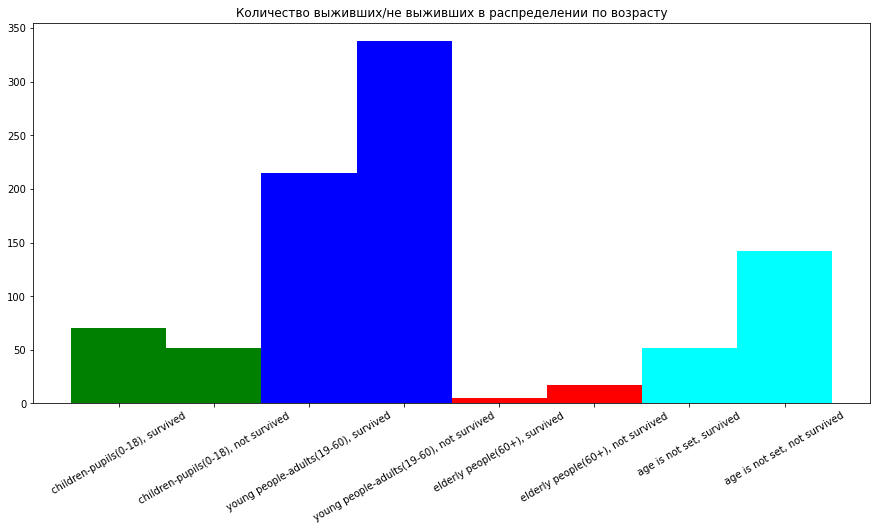

In [45]:
age_groups = {"children-pupils(0-18), survived": 0,"children-pupils(0-18), not survived": 0,
              "young people-adults(19-60), survived" : 0, "young people-adults(19-60), not survived" : 0,
              "elderly people(60+), survived" : 0, "elderly people(60+), not survived" : 0,
              "age is not set, survived" : 0, "age is not set, not survived" : 0}
for i in range(len(data.index)):
  if data.iloc[i]["Survived"] == 1 and data.iloc[i]["Age"] >= 0 and data.iloc[i]["Age"] <= 18:
    age_groups["children-pupils(0-18), survived"] += 1
  elif data.iloc[i]["Age"] >=0 and data.iloc[i]["Age"] < 18:
    age_groups["children-pupils(0-18), not survived"] += 1
  elif data.iloc[i]["Survived"] == 1 and data.iloc[i]["Age"] > 18 and data.iloc[i]["Age"] <= 60:
    age_groups["young people-adults(19-60), survived"] += 1
  elif data.iloc[i]["Age"] >= 19 and data.iloc[i]["Age"] <= 60:
    age_groups["young people-adults(19-60), not survived"] += 1
  elif data.iloc[i]["Survived"] == 1 and data.iloc[i]["Age"] > 60:
    age_groups["elderly people(60+), survived"] += 1
  elif data.iloc[i]["Age"] > 60:
    age_groups["elderly people(60+), not survived"] += 1
  elif data.iloc[i]["Survived"] == 1:
    age_groups["age is not set, survived"] += 1
  else:
    age_groups["age is not set, not survived"] += 1
print(age_groups)
fig = plt.figure(figsize=(15, 7))  
plt.bar(age_groups.keys(), age_groups.values(), width=1, color = ['g', 'g', 'b', 'b', 'r', 'r', 'aqua', 'aqua'])      
plt.title("Количество выживших/не выживших в распределении по возрасту")
plt.xticks(rotation = 30)          
plt.show()